In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
from google.colab import files


uploaded = files.upload()


Saving b_depressed.csv to b_depressed.csv


In [11]:
data = pd.read_csv("b_depressed.csv")
data.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [12]:
data.shape

(1429, 23)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

# Data Preprocessing

In [14]:
#Drop survey id and ville Id
data.drop(['Survey_id', 'Ville_id'], axis=1, inplace=True)
data.head()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1,27,1,2,10,4,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [15]:
##1. check missing values
data.isnull().sum()


sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

In [16]:
#Remove missing values
# Remove rows with missing values in the 'no_lasting_investment' column
data = data.dropna(subset=['no_lasting_investmen'])


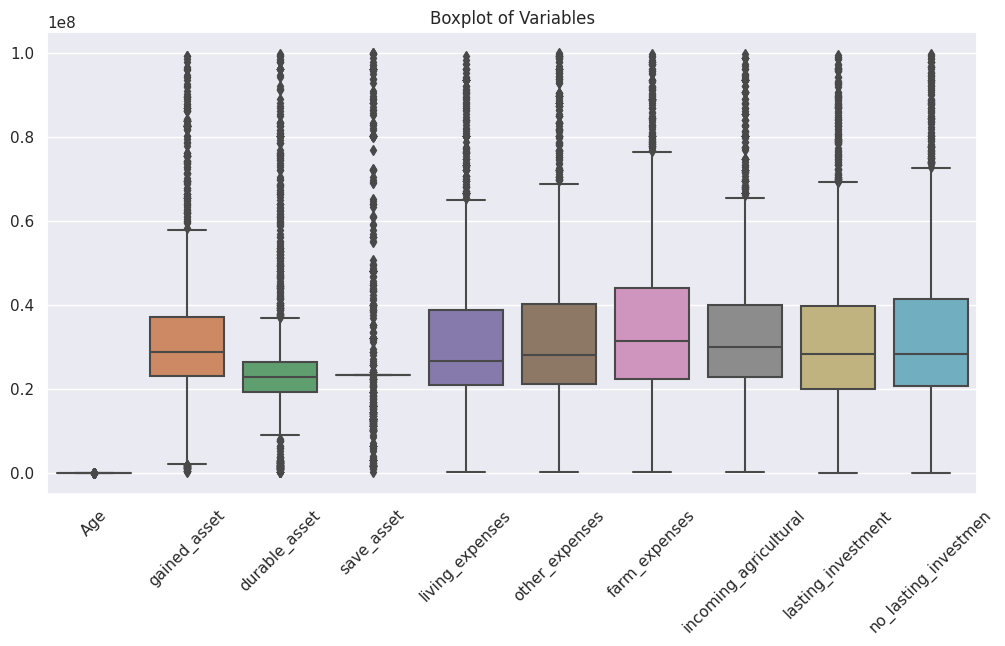

Outliers in Age:
      sex  Age  Married  Number_children  education_level  total_members  \
10      1   84        0                0                1              5   
141     1   69        0                1                6              2   
148     1   74        1                4                1              5   
161     1   69        1                3                7              6   
174     1   85        0                0                3              1   
204     1   76        0                5                1              7   
219     1   72        0                5                5              9   
266     0   73        0                3               10              5   
321     1   76        1                0               10              2   
330     1   81        0                0                1              5   
368     1   68        1                0                1              5   
380     1   91        0                0                8              

In [17]:

# Select the variables of interest
variables = ["Age", "gained_asset", "durable_asset", "save_asset", "living_expenses", "other_expenses", "farm_expenses", "incoming_agricultural", "lasting_investment", "no_lasting_investmen"]

# Create a boxplot for each variable to visualize potential outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[variables])
plt.xticks(rotation=45)
plt.title('Boxplot of Variables')
plt.show()

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data, variable):
    Q1 = np.percentile(data[variable], 25)
    Q3 = np.percentile(data[variable], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    return outliers

# Detect and print outliers for each variable
for variable in variables:
    outliers = detect_outliers_iqr(data, variable)
    if not outliers.empty:
        print(f"Outliers in {variable}:")
        print(outliers)
        print("\n")


In [19]:
from scipy import stats

# Detect and remove outliers using z-score method
z_scores = np.abs(stats.zscore(data[variables]))
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Remove outliers from the dataset
data = data.drop(data.index[outlier_indices[0]])

# Print the number of outliers detected and removed
print("Number of outliers detected and removed:")
for i, variable in enumerate(variables):
    print(f"{variable}: {len(outlier_indices[0][outlier_indices[1] == i])}")

Number of outliers detected and removed:
Age: 15
gained_asset: 11
durable_asset: 40
save_asset: 51
living_expenses: 8
other_expenses: 11
farm_expenses: 1
incoming_agricultural: 8
lasting_investment: 8
no_lasting_investmen: 5


# Descriptive statistics

In [20]:
#descriptive statistics
variables = ["Age", "gained_asset", "durable_asset", "save_asset", "living_expenses", "other_expenses", "farm_expenses", "incoming_agricultural", "lasting_investment", "no_lasting_investmen"]
newdata=data[variables]
newdata.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,1259.0,34.14,12.87,17.0,25.0,30.0,41.0,76.0
gained_asset,1259.0,33027747.25,19004190.73,388964.0,24681124.0,28912201.0,35524435.0,93596368.0
durable_asset,1259.0,25137328.23,14480386.32,162556.0,18818059.5,22861940.0,24319339.0,80877617.0
save_asset,1259.0,25104267.41,12829515.14,172966.0,23399979.0,23399979.0,23399979.0,80318225.0
living_expenses,1259.0,31768945.00,19861135.02,262919.0,21353827.0,26692283.0,36034582.0,95291452.0
other_expenses,1259.0,32621413.12,20161027.07,172966.0,21540673.0,28203066.0,37828304.0,97693758.0
farm_expenses,1259.0,35254361.67,20649328.69,271505.0,24023055.5,31363432.0,41873520.5,99219666.0
incoming_agricultural,1259.0,34013695.21,19770648.71,325112.0,24023056.0,30028818.0,38436887.0,96759529.0
lasting_investment,1259.0,32108202.68,20081557.22,74292.0,20728116.0,28411718.0,36946384.0,96373187.0
no_lasting_investmen,1259.0,33141931.53,20794479.52,127122.0,20902227.5,28292707.0,40038423.0,97871703.0


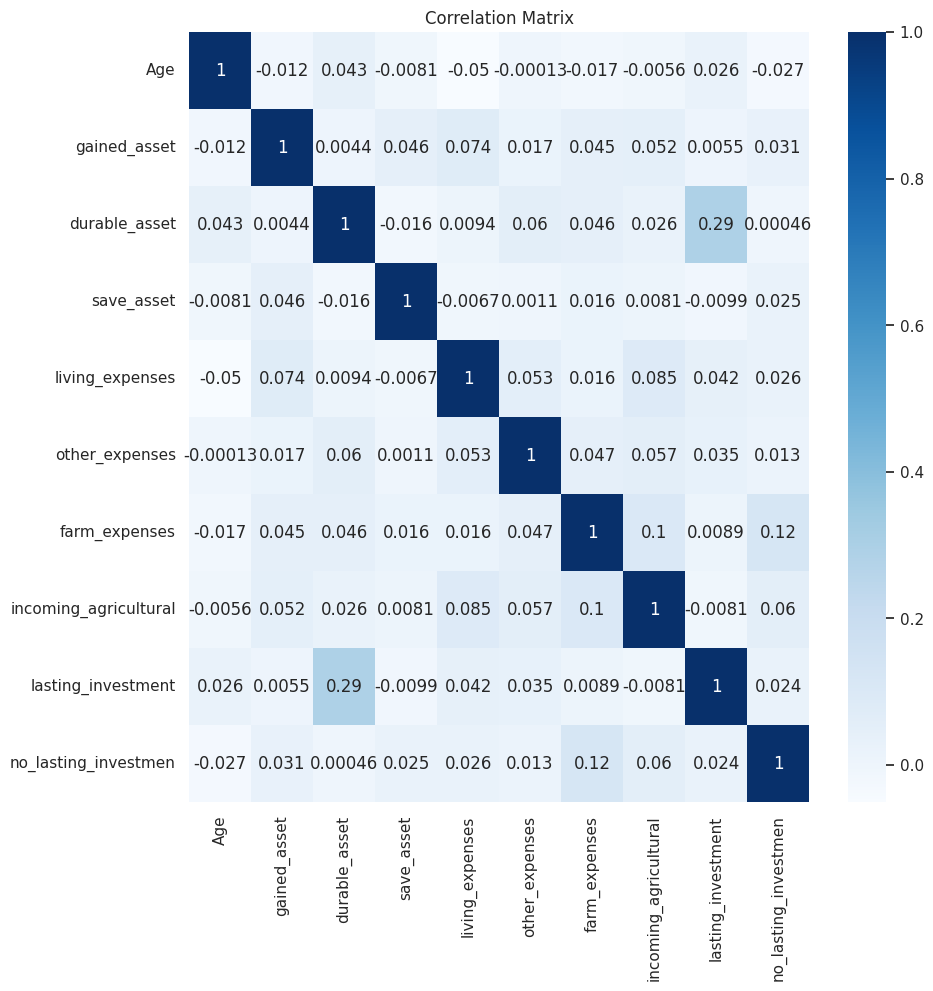

In [63]:
#correlation matrix
correlation = newdata.corr(method = 'pearson')
correlation

#Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

# EDA

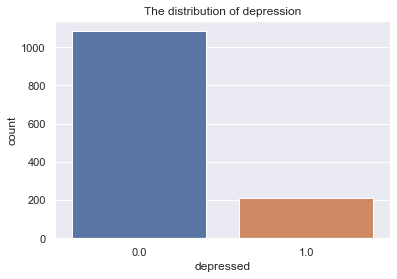

In [ ]:
#Distribution of Depression
sns.countplot(data=data, x="depressed")
plt.title("The distribution of depression")
plt.show()

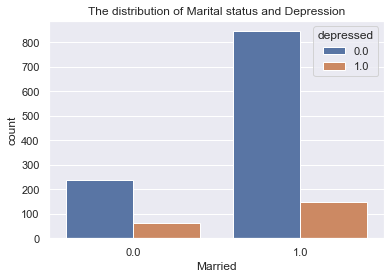

In [ ]:
##Distribution of depression and marital status
sns.countplot(data=data, x="Married", hue="depressed")
plt.title("The distribution of Marital status and Depression")
plt.show()

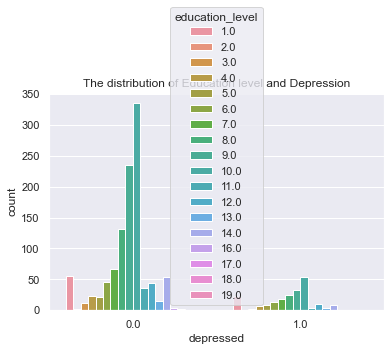

In [ ]:
##Distribution of depression and education level
sns.countplot(data=data, x="depressed", hue="education_level")
plt.title("The distribution of Education level and Depression")
plt.show()

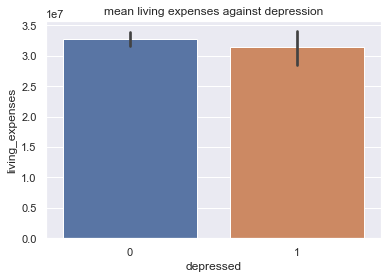

In [ ]:
##Distribution of mean living expenses against depression
sns.barplot(data=data, x="depressed", y="living_expenses")
plt.title("mean living expenses against depression")
plt.show()

# splitting data to train and test sets

In [25]:
## spliting daa
features = data.drop('depressed', axis=1)
target = data['depressed']

Counter(target)

Counter({0: 1056, 1: 203})

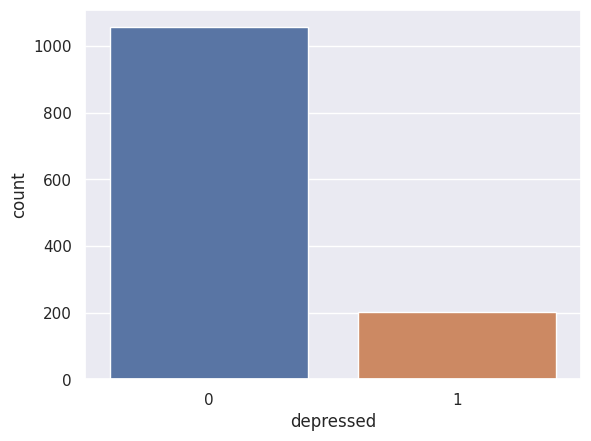

In [26]:
sns.countplot(data=data, x="depressed")
plt.show()

Resample Data

In [27]:
from imblearn.over_sampling import RandomOverSampler

sam = RandomOverSampler(random_state=42)

features, target = sam.fit_resample(features, target)

In [28]:
from collections import Counter

Counter(target)

Counter({0: 1056, 1: 1056})

Text Encoding with Get Dummies

In [31]:
#Text Encoding with Get Dummies
data_encoded = pd.get_dummies(features, drop_first=True)
data_encoded.head(3)

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0


In [35]:
from sklearn.feature_selection import SelectKBest

fe = SelectKBest(k=10).set_output(transform="pandas")
selected_features = fe.fit_transform(data_encoded, target)

selected_features.head()

,sex,Age,Married,Number_children,education_level,total_members,incoming_business,incoming_agricultural,lasting_investment,no_lasting_investmen
0,1.0,28.0,1.0,4.0,10.0,5.0,0.0,30028818.0,28411718.0,28292707.0
1,1.0,23.0,1.0,3.0,8.0,5.0,0.0,30028818.0,28411718.0,28292707.0
2,1.0,22.0,1.0,3.0,9.0,5.0,0.0,30028818.0,28411718.0,28292707.0
3,1.0,27.0,1.0,2.0,10.0,4.0,0.0,22288055.0,7781123.0,69219765.0
4,0.0,59.0,0.0,4.0,10.0,6.0,0.0,53384566.0,20100562.0,43419447.0


In [36]:
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sex                    2112 non-null   float64
 1   Age                    2112 non-null   float64
 2   Married                2112 non-null   float64
 3   Number_children        2112 non-null   float64
 4   education_level        2112 non-null   float64
 5   total_members          2112 non-null   float64
 6   incoming_business      2112 non-null   float64
 7   incoming_agricultural  2112 non-null   float64
 8   lasting_investment     2112 non-null   float64
 9   no_lasting_investmen   2112 non-null   float64
dtypes: float64(10)
memory usage: 165.1 KB


Transform Target

In [37]:

from sklearn.preprocessing import LabelEncoder

target =  LabelEncoder()\
          .fit_transform(target)

Train and Test Data

In [38]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_encoded, target,
                                                    test_size=0.2, shuffle=True,
                                                    random_state=42, stratify=target)

Scaling data

In [39]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Modeling


Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [41]:
preds = lr.predict(x_test_scaled)

acc_score = accuracy_score(y_test, preds)
prec_score = precision_score(y_test, preds)
rec_score = recall_score(y_test, preds)
F1_score = f1_score(y_test, preds)


print(f"The accuracy score of the model is {acc_score}")
print(f"The precision score of the model is {prec_score}")
print(f"The recall score of the model is {rec_score}")
print(f"The f1 score score of the model is {F1_score}")

print(classification_report(y_test, preds))

The accuracy score of the model is 0.5460992907801419
The precision score of the model is 0.5492227979274611
The recall score of the model is 0.5023696682464455
The f1 score score of the model is 0.5247524752475248
              precision    recall  f1-score   support

           0       0.54      0.59      0.57       212
           1       0.55      0.50      0.52       211

    accuracy                           0.55       423
   macro avg       0.55      0.55      0.55       423
weighted avg       0.55      0.55      0.55       423



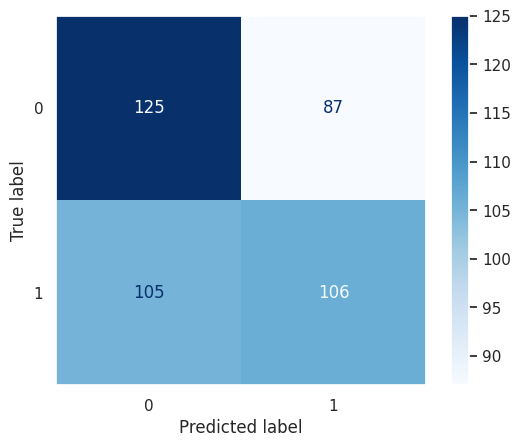

In [42]:
def plot_conf_matrix():
    cm = confusion_matrix(y_test, preds)
    cm = ConfusionMatrixDisplay(cm)
    cm.plot(cmap="Blues")
    plt.grid(False)

plot_conf_matrix()

Logistic regression parametr tuning

In [43]:
from sklearn.model_selection import GridSearchCV

params = {

    'C':[1,5, 10, 20],
    'penalty':['l1', 'l2']
}

lr_grid = GridSearchCV(lr, params, n_jobs=-1)
lr_grid.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1, 5, 10, 20], 'penalty': ['l1', 'l2']})

In [44]:
def grid_search_tuning_results(model):
    girdpreds = model.best_estimator_.predict(x_test_scaled)
    cm = confusion_matrix(y_test, girdpreds)

    print("accuracy:",accuracy_score(y_test, girdpreds))
    print("precision:",precision_score(y_test, girdpreds))
    print("recall:",recall_score(y_test, girdpreds))
    print("F1 score:",f1_score(y_test, girdpreds))
    print("specifity", ((cm[1,1])/(cm[1,1]+cm[0,1])))

grid_search_tuning_results(lr_grid)

accuracy: 0.5602836879432624
precision: 0.5634517766497462
recall: 0.5260663507109005
F1 score: 0.5441176470588235
specifity 0.5634517766497462


Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [46]:
preds = rf.predict(x_test_scaled)

rf_acc_score = accuracy_score(y_test, preds)
rf_prec_score = precision_score(y_test, preds)
rf_rec_score = recall_score(y_test, preds)
rf_F1_score = f1_score(y_test, preds)


print(f"The accuracy score of the model is {rf_acc_score}")
print(f"The precision score of the model is {rf_prec_score}")
print(f"The recall score of the model is {rf_rec_score}")
print(f"The f1 score score of the model is {rf_F1_score}")

print(classification_report(y_test, preds))

The accuracy score of the model is 0.9479905437352246
The precision score of the model is 0.9162995594713657
The recall score of the model is 0.985781990521327
The f1 score score of the model is 0.949771689497717
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       212
           1       0.92      0.99      0.95       211

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



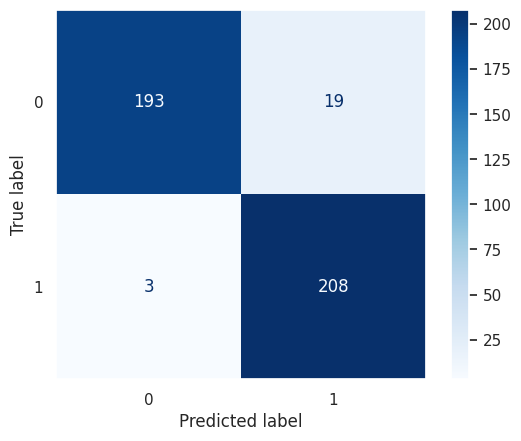

In [47]:
plot_conf_matrix()

Random Forest parametr tuning

In [54]:
params = {
    'max_depth':[2,3,4,10,20],
    'n_estimators':[50, 100, 120]
}


rf_grid = GridSearchCV(rf, params, cv=2, n_jobs=-1)
rf_grid.fit(x_train_scaled, y_train)
grid_search_tuning_results(rf_grid)

accuracy: 0.9219858156028369
precision: 0.908256880733945
recall: 0.9383886255924171
F1 score: 0.923076923076923
specifity 0.908256880733945


Support Vector Machine

In [50]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train_scaled, y_train)

preds = svc.predict(x_test_scaled)

svm_acc_score = accuracy_score(y_test, preds)
svm_prec_score = precision_score(y_test, preds)
svm_rec_score = recall_score(y_test, preds)
svm_F1_score = f1_score(y_test, preds)


print(f"The accuracy score of the model is {svm_acc_score}")
print(f"The precision score of the model is {svm_prec_score}")
print(f"The recall score of the model is {svm_rec_score}")
print(f"The f1 score score of the model is {svm_F1_score}")

print(classification_report(y_test, preds))

The accuracy score of the model is 0.5484633569739953
The precision score of the model is 0.6470588235294118
The recall score of the model is 0.20853080568720378
The f1 score score of the model is 0.3154121863799283
              precision    recall  f1-score   support

           0       0.53      0.89      0.66       212
           1       0.65      0.21      0.32       211

    accuracy                           0.55       423
   macro avg       0.59      0.55      0.49       423
weighted avg       0.59      0.55      0.49       423



Support Vector Machine parametr tuning

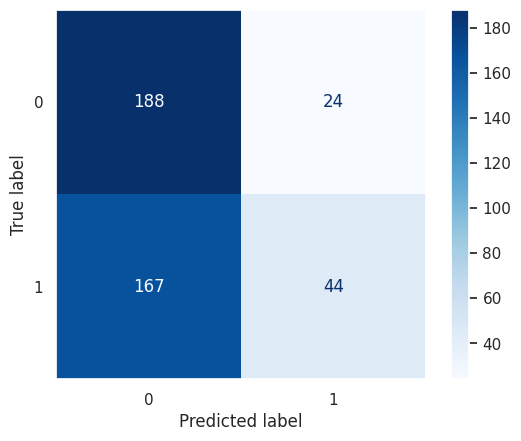

In [58]:
plot_conf_matrix()

In [53]:
params = {
    'C':[0.1,1,4,10],
}


svm_grid = GridSearchCV(svc, params, cv=2, n_jobs=-1)
svm_grid.fit(x_train_scaled, y_train)
grid_search_tuning_results(svm_grid)

accuracy: 0.5484633569739953
precision: 0.6470588235294118
recall: 0.20853080568720378
F1 score: 0.3154121863799283
specifity 0.6470588235294118


Feature Importance

In [56]:
! pip install scikit-plot -q

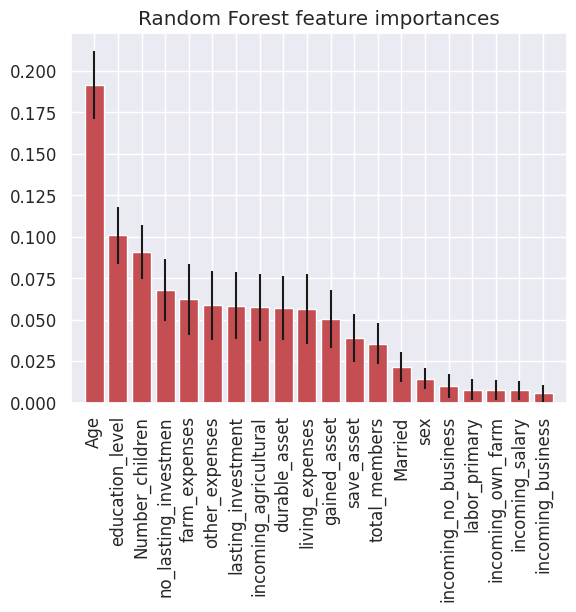

In [57]:
import scikitplot as skplt

skplt.estimators.plot_feature_importances(rf, feature_names=x_train_scaled.columns.to_list(), title="Random Forest feature importances")
plt.xticks(rotation=90)
plt.show()

# Model Comparison

In [59]:
models = pd.DataFrame({

    'Model':["Logistic Regression", "Random Forest", "SVM"],
    'Accuracy':[acc_score, rf_acc_score, svm_acc_score],
    'Precision':[prec_score, rf_prec_score, svm_prec_score],
    'Recall':[rec_score, rf_rec_score, svm_rec_score],
    'F1 score':[F1_score, rf_F1_score, svm_F1_score]
}).round(2)

models['Accuracy'] = models['Accuracy']
models['Precision'] = models['Precision']
models['Recall'] = models['Recall']
models['F1 score'] = models['F1 score']
models.sort_values('Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 score
1,Random Forest,0.95,0.92,0.99,0.95
0,Logistic Regression,0.55,0.55,0.50,0.52
2,SVM,0.55,0.65,0.21,0.32
